# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business Goal:

Identify key drivers for used car prices to recommendate what consumers value in a used car to a car dealership client

### Data Problem to Solve:
Explore data to identify the relevant data insights to achieve the business goal

### Data Provided: 
1. number of records: 426,880
2. columns: 18 columns with price, vehicle attributes, and geographical variables     

### Data Analytics Process Summary:
#### Section 1. Data Understanding

 - Step 1. Initial Data Review (will review time series perspective if time permits)   
     - there are some missing across most of variables; no duplicates
     
 - Step 2. Project Data Scope: 
 
     - Given the data review, the records with price > $50 & year >=1980 are determined to be meaningful for the business goal      
     
 - Step 3. Data Cleaning   
     - 1. Target: Dropping records without meaningful price; Dealing with outliers
     - 2. Dealing with missing values
      
 - Step 4. Missing Data Imputation

 - Step 5. Exploratory Data Analysis
    
 - Step 6. Feature Engineering & Data Pre-processing 
    
       - Unsupervised learning PCA to reduce data dimentionality 
    
#### Section 2. Modeling
     - Supervised learning to build price predictive model
     - Feature Importance Selection vs PCA (as a comparison)
#### Section 3. Evaluation
#### Section 4. Deployment
#### Section 5. Next Steps

1. PCA: performed but not implemented as less interpretable 
2. DBSCAN could be utilized to identify outliers
3. Time series: price vs year
4. VIN: could be decoded to have more accurate vehicle attributes
5. More Feature Engineering
6. Analytics Tool Development, such as a interactive pricing dashboard 

### Section 1. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

#### Step 1. Initial Data Review (will review time series perspective if time permits)   
     - Output: there are some missing across most of variables; no duplicates

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

In [68]:
import pandas as pd
pd.options.display.max_rows=10
import numpy as np
import os
from scipy.stats import uniform, norm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

#Ignore any warnings
import warnings
warnings.filterwarnings('ignore')
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Code that might trigger warnings
    warnings.warn("This warning will be hidden", UserWarning)

# Utility Functions
def df_eds(df,head_size = 5, tail_size = 5, show_info = True):
    '''print df summary statistics to screen'''
    print_heading("Data Overview Summary")
    
    print("\nTop 5 Rows:\n")                                   # Review Top 5 Rows
    display(df.head(head_size))
    
    print("\nBottom 5 Rows:\n")                                # Review Bottom 5 Rows
    display(df.tail(tail_size))
    
    print("\nDescriptive Statistics:\n")                       # Review Descriptive Statistics
    display(df.describe().transpose())
    # df_hc['col'].value_counts(normalize = True)
    if show_info:            
        print("\nData Table: Row x Column\n")                  # Review # of Row x By of Column
        display(df.shape)
    
        print("\nData Table: Column Names and Data Types\n")   # Review Column Names and Data Types
        display(df.info())
    
        # print("\nData Table: Most frequent\n")   # Review Column Names and Data Types
        # display(df[col].mode())
     
        print("\nUnique Values by Column:\n")                  # Review Unique Values by Column
        display(df.nunique())

        print("\nDuplicated Row(s): \n")                       # Review Unique Values by Column
        display(df[df.duplicated()].shape[0])
        
        # gapminder.continent.unique()
        print("\nMissing Values by Column:\n")                 # Review Missing Values By Column
        display(df.isnull().sum()[df.isnull().sum() > 0])                             # df.isna().sum()    
        df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False).plot(kind = 'bar')                
        plt.show()
# df_eds(data)


def print_heading(heading):
    print("\n" + "="*60)
    print(heading)
    print("="*60)


# Function to print brief info for the given DataFrame object and column
def print_col_info(df, col):
    print(f"\nColumn: {col}")
    print(df[col].value_counts(normalize=True, sort=True, ascending=False))
    print(f"Unique values: {df[col].nunique()}\n")    
    print(f"Most frequent: {df[col].mode()}\n")
    print(f"Missing values: {df[col].isnull().sum()}\n")


Data Overview Summary

Top 5 Rows:



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc



Bottom 5 Rows:



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy



Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07



Data Table: Row x Column



(426880, 18)


Data Table: Column Names and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state 

None


Unique Values by Column:



id              426880
region             404
price            15655
year               114
manufacturer        42
                 ...  
drive                3
size                 4
type                13
paint_color         12
state               51
Length: 18, dtype: int64


Duplicated Row(s): 



0


Missing Values by Column:



year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
                 ...  
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
Length: 14, dtype: int64

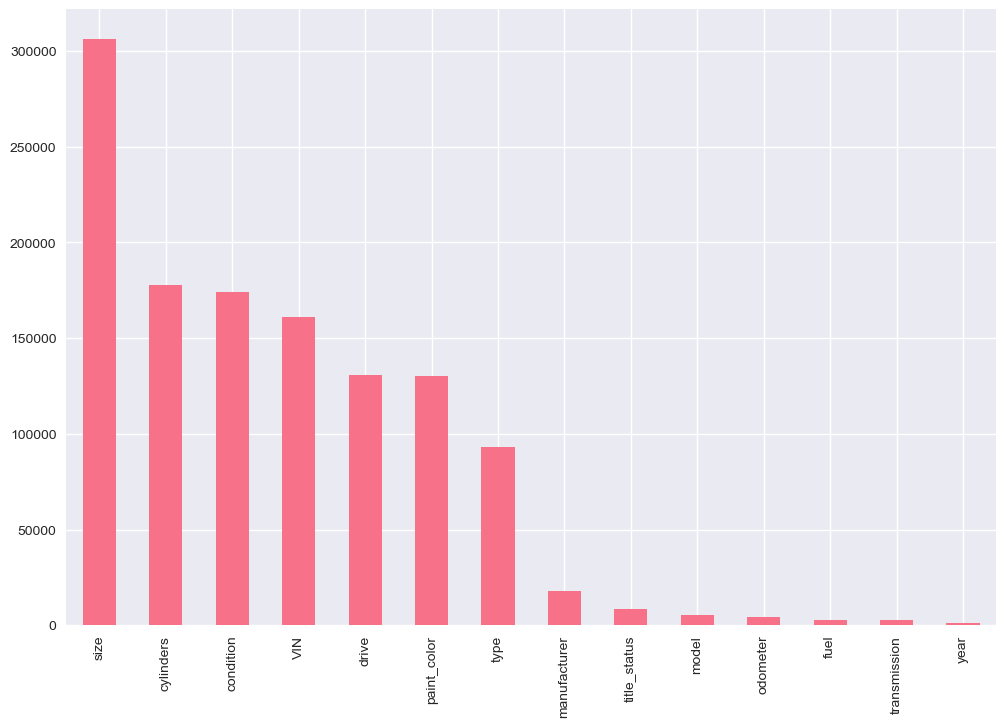

In [163]:
df = pd.read_csv("data/vehicles.csv")
df_eds(df)


DATASET OVERVIEW
Number of Records: 426,880
Year Range: 1900 - 2022

Vehicle Attribues:
Manufacturers: 42
Model: 29649
Condition: 6
Cylinders: 8
Fuel: 5
Odometer: 104870
Title_Status: 6
Transmission: 3
VIN: 118246
Drive: 3
Size: 4
Type: 13
Paint_Color: 12

Geographic Range:
Regions: 404
States: 51

Target Variable - Vehicle Price Unique Values
Price: 15655
Price Statistics: count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
max      3.736929e+09
Name: price, dtype: float64
Price Statistics: Boxplot


{'whiskers': [<matplotlib.lines.Line2D at 0x2d40ef72490>,
 'caps': [<matplotlib.lines.Line2D at 0x2d40ef72710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d40ef72350>],
 'medians': [<matplotlib.lines.Line2D at 0x2d40ef72990>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d40ef72ad0>],
 'means': []}

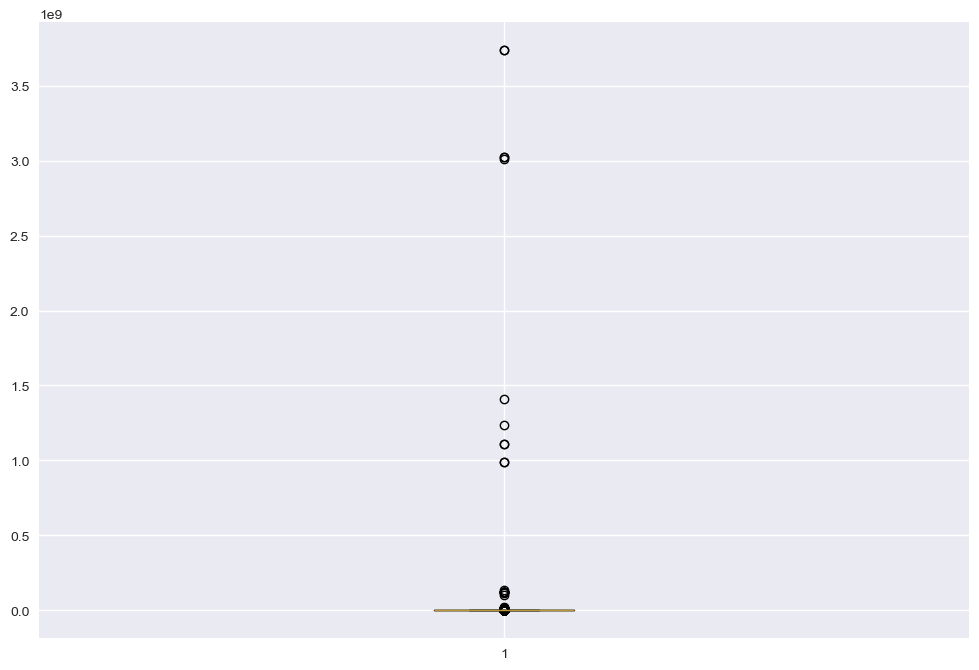

In [164]:
print_heading("DATASET OVERVIEW")
print(f"Number of Records: {len(df):,}")
print(f"Year Range: {int(df['year'].min())} - {int(df['year'].max())}")
            
print("\nVehicle Attribues:")
print(f"Manufacturers: {df['manufacturer'].nunique()}")
print(f"Model: {df['model'].nunique()}")
print(f"Condition: {df['condition'].nunique()}")
print(f"Cylinders: {df['cylinders'].nunique()}")
print(f"Fuel: {df['fuel'].nunique()}")
print(f"Odometer: {df['odometer'].nunique()}")
print(f"Title_Status: {df['title_status'].nunique()}")
print(f"Transmission: {df['transmission'].nunique()}")
print(f"VIN: {df['VIN'].nunique()}")
print(f"Drive: {df['drive'].nunique()}")
print(f"Size: {df['size'].nunique()}")
print(f"Type: {df['type'].nunique()}")
print(f"Paint_Color: {df['paint_color'].nunique()}")

print("\nGeographic Range:") 
print(f"Regions: {df['region'].nunique()}")
print(f"States: {df['state'].nunique()}")


print("\nTarget Variable - Vehicle Price Unique Values")
print(f"Price: {df['price'].nunique()}")
print(f"Price Statistics: {df['price'].describe()}")
print(f"Price Statistics: Boxplot")
plt.boxplot(df['price'])

In [165]:
# Calculate missing values and their percentage
def missing_data_summary(df, sort = True, round_decimals = 2):
    missing_df = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Missing %': (df.isnull().sum() / len(df) * 100).round(2)
    })

    # show only columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    if sort:
        missing = missing_df.sort_values(by='Missing %', ascending=False)

    return missing

missing_df = missing_data_summary(df)
missing_df

,Missing Count,Missing %
size,306361,71.77
cylinders,177678,41.62
condition,174104,40.79
VIN,161042,37.73
drive,130567,30.59
...,...,...
model,5277,1.24
odometer,4400,1.03
fuel,3013,0.71
transmission,2556,0.60


#### Step 2. Project Data Scope: 

Based on the Initial Data Review:
- 1. Records with `price < $100 & year <=1990` are not meaningful for this business goal so will be dropped
- 2. Records with `odometer`<= 0 & `odometer` > 500000 are not meaningful for this business goal so will be dropped
- 3. Variables with a `missing % >= 70%` could be too time consuming to work with so `Size` will be dropped for this iteration of analysis
- 4. Categorical variables have too many levels will be dropped for now: 
     - `Model` (29649 levels) will be dropped for this iteration of analysis
- 5. Geographical variable `Regions` (404 levels) will be dropped for this iteration of analysis (`State` will be used instead) 
- 6. `VIN` could be decoded and cleaned up to obtain accurate vehicle attributes but it is out of scope of this iteration of analysis 
- 7. `id` will be dropped from analysis

#### Step 3. Data Cleaning: drop records according to data scope in Step 2

 - 1. Assuming `price` needs to be >=50, otherwise, likely a gift & <=100K, otherwise, too expensive to regular customers / rare customized unique car
 - 2. Assuming `odometer` needs to be > 0 & `odometer` < 500000
   3. `Size`: too much missing data over 70% so drop
 - 3. `Model`: too many levels/unique values 29649 - drop for this analysis
 - 4. `Region`: too many levels (404) / unique values - drop for this analysis
 - 5. `VIN`: not usable directly - drop for now (can do decode VIN later when time allows)
 - 6. `id`: no meaning


In [174]:
# filter unreasonable values
numeric_cols = ['year', 'odometer', 'price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df1 = df.loc[(df['price']>100) & (df['price']<100000)] # 37086 records were deleted
# df1=df.loc[~df['price_grp'].isin(['invalid'])]
print(f'Number of invalid price records dropped: {(df.shape[0] - df1.shape[0])}, {round((df.shape[0] - df1.shape[0])/df.shape[0],2)*100} % of total')
df.shape, df1.shape, (df.shape[0] - df1.shape[0])

Number of invalid price records dropped: 37086, 9.0 % of total


((426880, 18), (389794, 18), 37086)

In [175]:
# drop records with missing or too old years not in the scope:
df2 = df1.loc[(~pd.isna('year')) & (df['year']>1990)] # 13565 records were deleted
print(f'Number of very old year records dropped: {(df1.shape[0] - df2.shape[0])}, {round((df1.shape[0] - df2.shape[0])/df.shape[0],2)*100} % of total')
df1.shape, df2.shape, (df1.shape[0] - df2.shape[0])

Number of very old year records dropped: 13565, 3.0 % of total


((389794, 18), (376229, 18), 13565)

In [176]:
# Apply reasonable filters
df3 = df2.loc[(df2['odometer'] > 0) & (df2['odometer'] < 500000)] # 3956 records were deleted
df2.shape, df3.shape, (df2.shape[0] - df3.shape[0])

((376229, 18), (372273, 18), 3956)

In [177]:
df4 = df3.drop(columns=["VIN", "size","region","model","id"], axis=1)
df4.shape

(372273, 13)

In [178]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372273 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         372273 non-null  int64  
 1   year          372273 non-null  float64
 2   manufacturer  360523 non-null  object 
 3   condition     229217 non-null  object 
 4   cylinders     219758 non-null  object 
 5   fuel          370196 non-null  object 
 6   odometer      372273 non-null  float64
 7   title_status  365319 non-null  object 
 8   transmission  370771 non-null  object 
 9   drive         259659 non-null  object 
 10  type          294565 non-null  object 
 11  paint_color   263346 non-null  object 
 12  state         372273 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 39.8+ MB


In [181]:
df_zscore = df4[np.abs(stats.zscore(df4['price'])) < 3].copy()
print(df_zscore['price'].describe())

iqr_data_lost = 1 - (df_zscore.shape[0]/df4.shape[0])
print("{:.2%} of the data was identified as outlier and dropped by the z-score method".format(iqr_data_lost))
print(df4.shape)

count    367532.000000
mean      18267.007618
std       13058.143796
min         101.000000
25%        7495.000000
50%       15495.000000
75%       26999.000000
max       62019.000000
Name: price, dtype: float64
1.27% of the data was identified as outlier and dropped by the z-score method
(372273, 13)


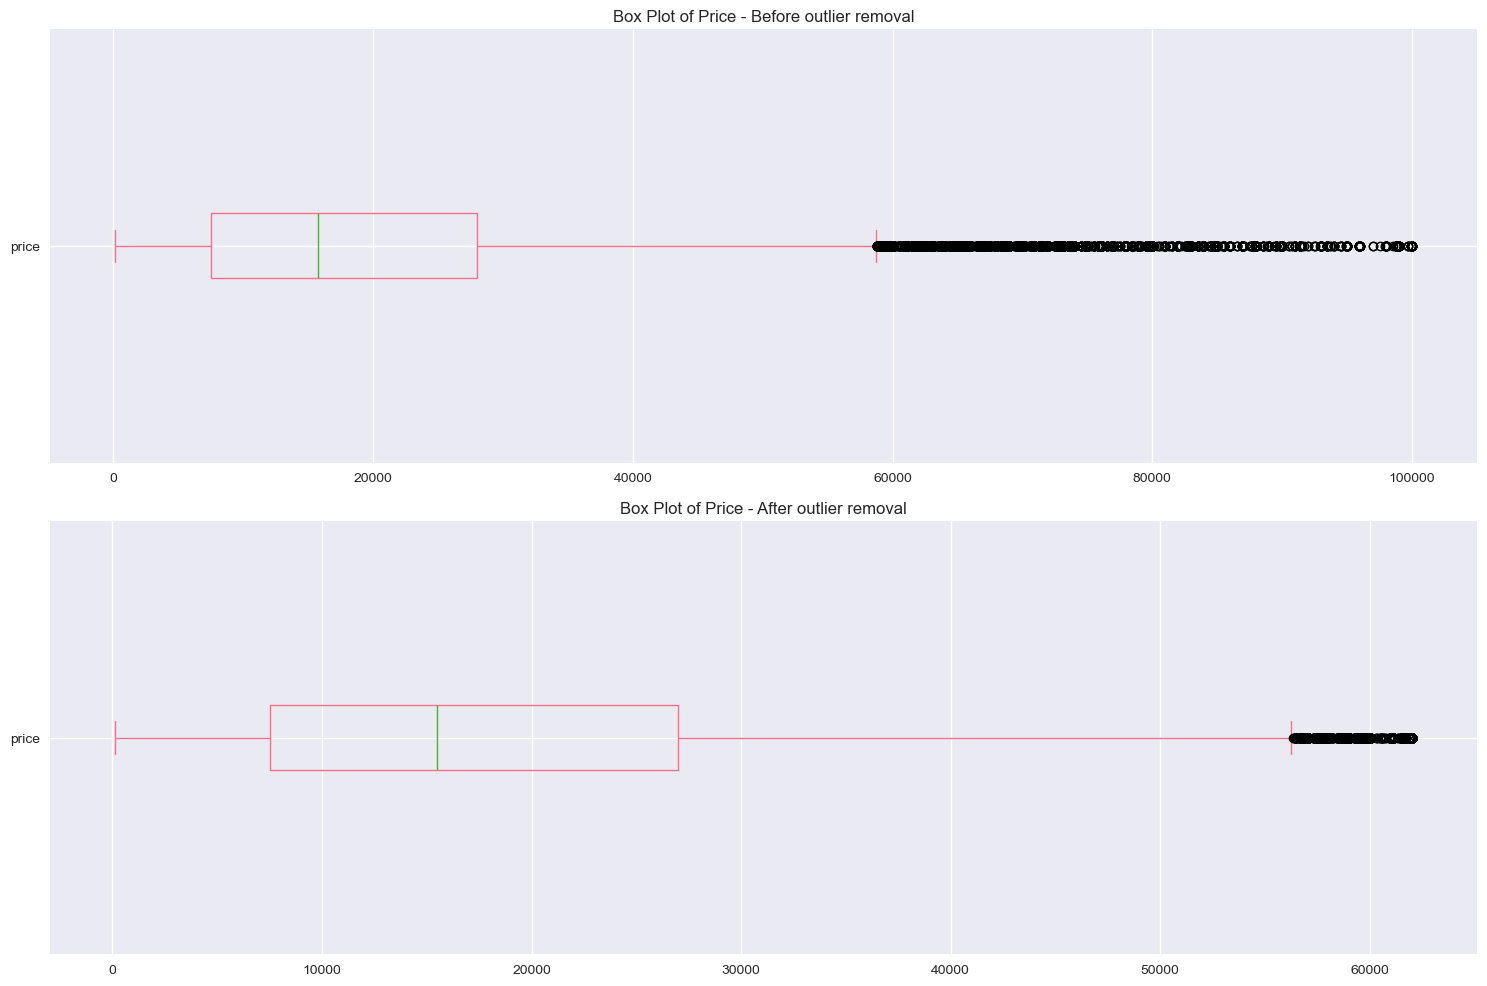

In [183]:
# Compare boxplots showing price distribution before and after outlier removal.    
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Before outlier removal
df4['price'].plot(kind='box', vert=False, ax=axes[0])
axes[0].set_title('Box Plot of Price - Before outlier removal')

# After outlier removal
df_zscore['price'].plot(kind='box', vert=False, ax=axes[1])
axes[1].set_title('Box Plot of Price - After outlier removal')

plt.tight_layout()
plt.show()

#### Step 4. Missing Data Imputation

In [184]:
# Calculate and review  missing values and their percentage
def missing_data_summary(df_zscore, sort = True, round_decimals = 2):
    missing_df = pd.DataFrame({
        'Missing Count': df_zscore.isnull().sum(),
        'Missing %': (df4.isnull().sum() / len(df4) * 100).round(2)
    })

    # show only columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    if sort:
        missing = missing_df.sort_values(by='Missing %', ascending=False)

    return missing
    
missing_df = missing_data_summary(df4)
missing_df

,Missing Count,Missing %
cylinders,152515,40.97
condition,143056,38.43
drive,112614,30.25
paint_color,108927,29.26
type,77708,20.87
manufacturer,11750,3.16
title_status,6954,1.87
fuel,2077,0.56
transmission,1502,0.40


In [185]:
# Define and review missing values for the required columns: 'model', 'manufacturer', 'year', 'odometer'
req_cols = ['title_status', 'manufacturer', 'year']

# Drop rows where ALL critical columns are missing
df5 = df_zscore.dropna(subset=req_cols, how='all')
# Sort by highest percentage of missing values
missing_df = missing_data_summary(df4)
missing_df

,Missing Count,Missing %
cylinders,152515,40.97
condition,143056,38.43
drive,112614,30.25
paint_color,108927,29.26
type,77708,20.87
manufacturer,11750,3.16
title_status,6954,1.87
fuel,2077,0.56
transmission,1502,0.40


In [186]:

# Use mode imputation for fuel, title_status, transmission.
mode_cols = ['fuel', 'title_status', 'transmission','cylinders','type','drive','condition']
for col in mode_cols:
    df5.fillna({col: df5[col].mode()[0]}, inplace=True)
    
# Use new category "missing" for columns ['condition', 'cylinders', 'drive', 'type', 'paint_color', 'state','manufacturer'] to preserve data volume.
missing_cols=['paint_color', 'state','manufacturer']
for col in missing_cols:
    df5[col].fillna('missing', inplace=True)
    
# Use median to impute odometer
median_col=['odometer']
for col in median_col:
    df5[col].fillna(df5[col].median(), inplace=True)

In [187]:
# Calculate missing values and their percentage
def missing_data_summary(df5, sort = True, round_decimals = 2):
    missing_df = pd.DataFrame({
        'Missing Count': df5.isnull().sum(),
        'Missing %': (df5.isnull().sum() / len(df5) * 100).round(2)
    })

    # show only columns with missing values
    missing_df = missing_df[missing_df['Missing Count'] > 0]

    if sort:
        missing = missing_df.sort_values(by='Missing %', ascending=False)

    return missing
    
missing_df = missing_data_summary(df5)
missing_df

,Missing Count,Missing %


#### Step 5. Exploratory Data Analysis

##### 1. Numeric Features

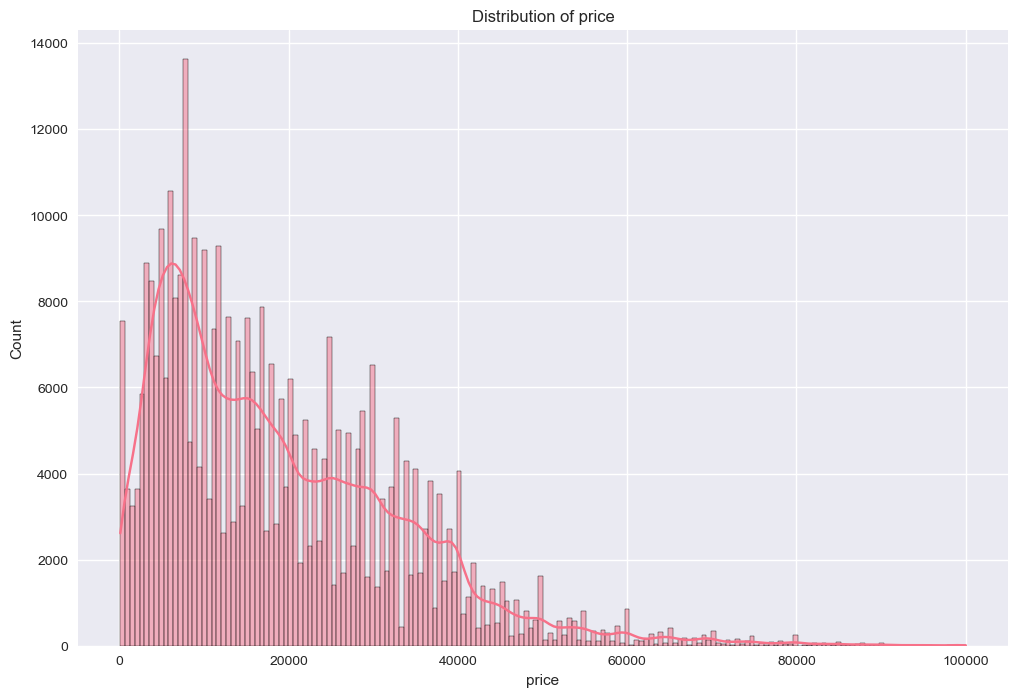

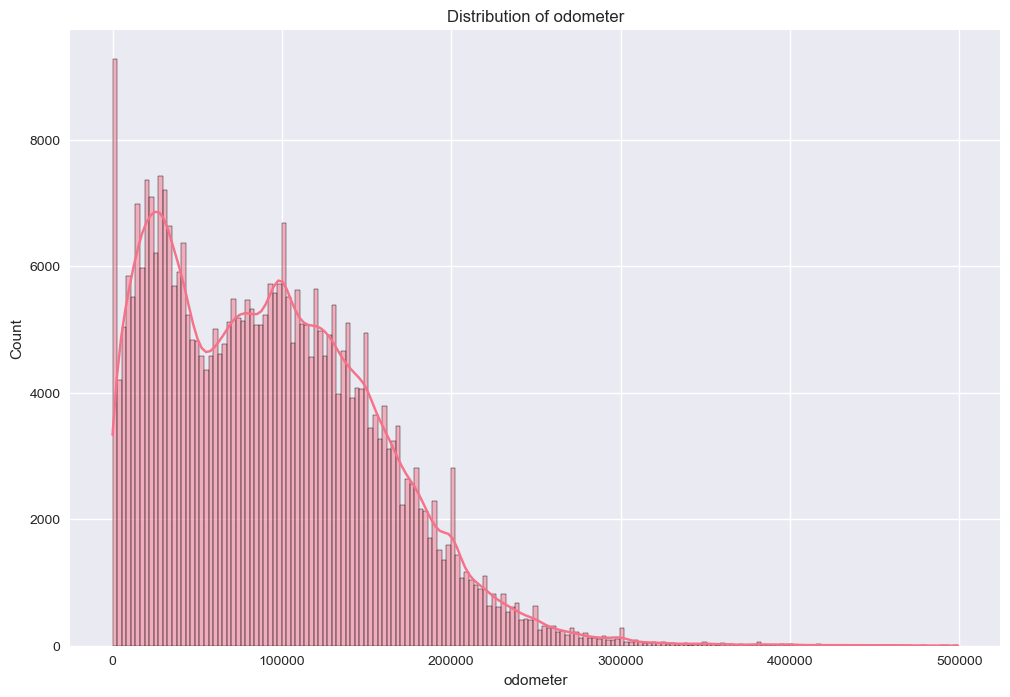

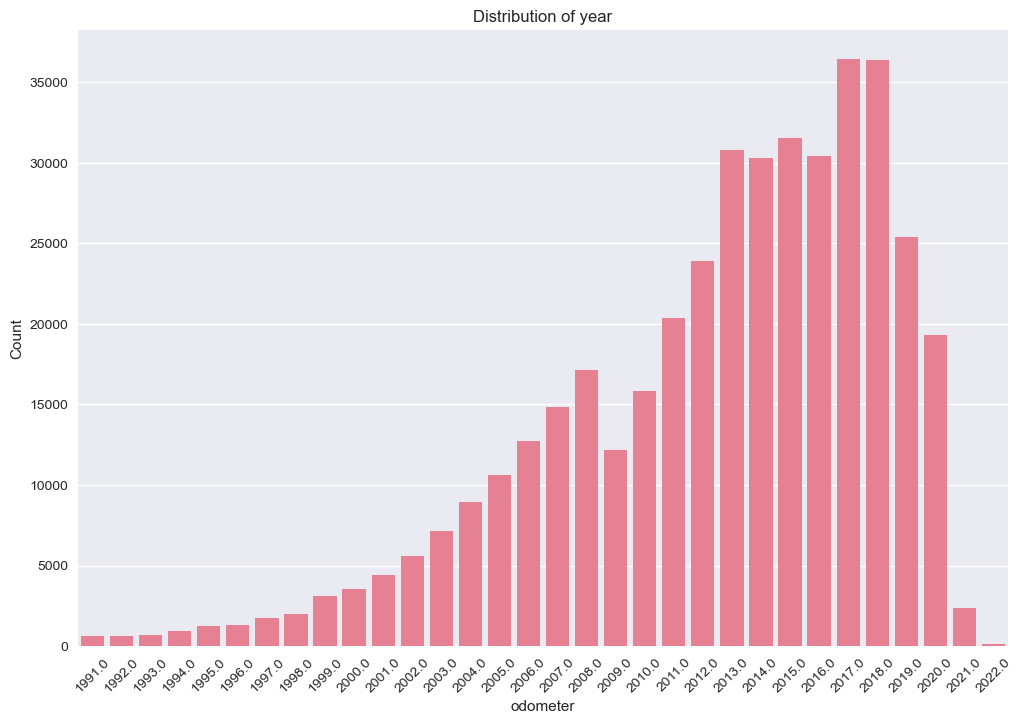

In [188]:
df5[['price', 'odometer', 'year']].describe().T.round(2)

for col in ['price', 'odometer']:
    sns.histplot(df3[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

sns.countplot(data=df, x='year', order=sorted(df3['year'].dropna().unique()))
plt.title(f'Distribution of year')
plt.xticks(rotation=45)
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

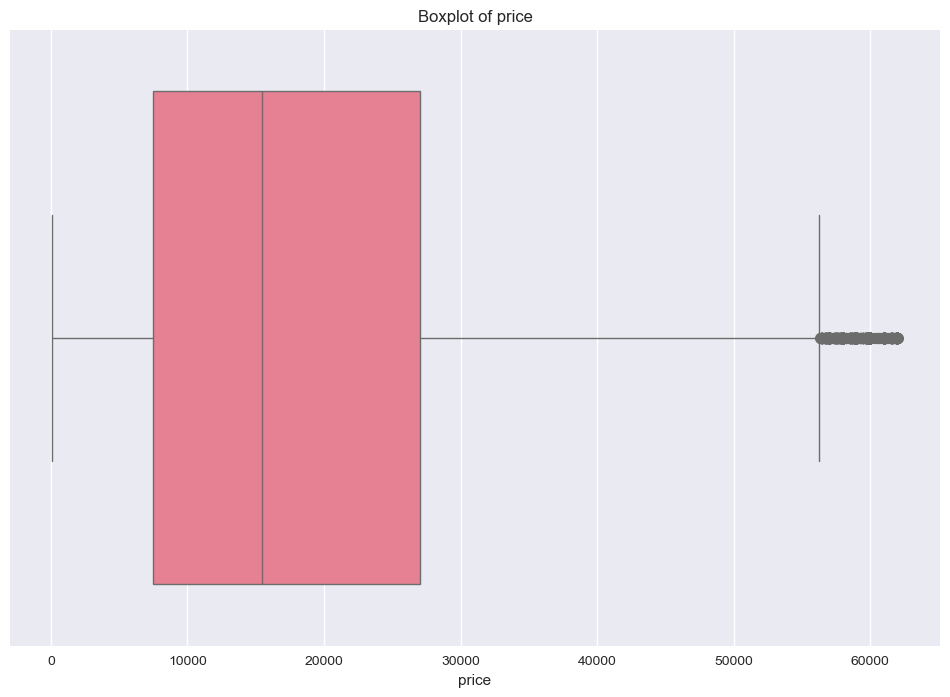

In [189]:
for col in ['price']:
    sns.boxplot(x=df5[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

##### 2. Categorical Features

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
# List of categorical variables
# df2['year'] = df2['year'].astype('int').astype('object')
var_col=['year', 'manufacturer','condition', 'cylinders', 'fuel', 'title_status', 
          'transmission', 'drive', 'type', 'paint_color', 'state']

# === Mean price by category (grouped output) ===

for col in var_col:
    print(f"\n=== {col} ===")
    try:
        group_stats = df5.groupby(col)['price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
        print(group_stats.round(2))
    except Exception as e:
        print(f"Could not process column '{col}': {e}")



=== year ===
            mean  count
year                   
2020.0  34202.90  16299
2019.0  31436.78  21466
2018.0  28506.20  31149
2021.0  26811.56   1482
2017.0  25738.89  31035
...          ...    ...
2022.0   7163.79     87
2003.0   7138.26   6788
2000.0   7108.69   3363
2002.0   6924.02   5316
1998.0   6787.18   1915

[32 rows x 2 columns]

=== manufacturer ===
                  mean  count
manufacturer                 
tesla         36710.79    768
alfaromeo     29911.32    828
ram           28790.67  15611
porsche       28106.12   1075
astonmartin   27834.82     11
...                ...    ...
pontiac        6020.98   1803
ferrari        5263.50      4
saturn         5149.41   1065
mercury        4376.94    971
morgan         1400.00      2

[42 rows x 2 columns]

=== condition ===
               mean   count
condition                  
new        21109.53     897
good       19852.84  254040
like new   17714.90   18819
excellent  14744.62   87924
salvage     3936.09     487
f

Failed to plot 'Luxury_Ind': 'Luxury_Ind'


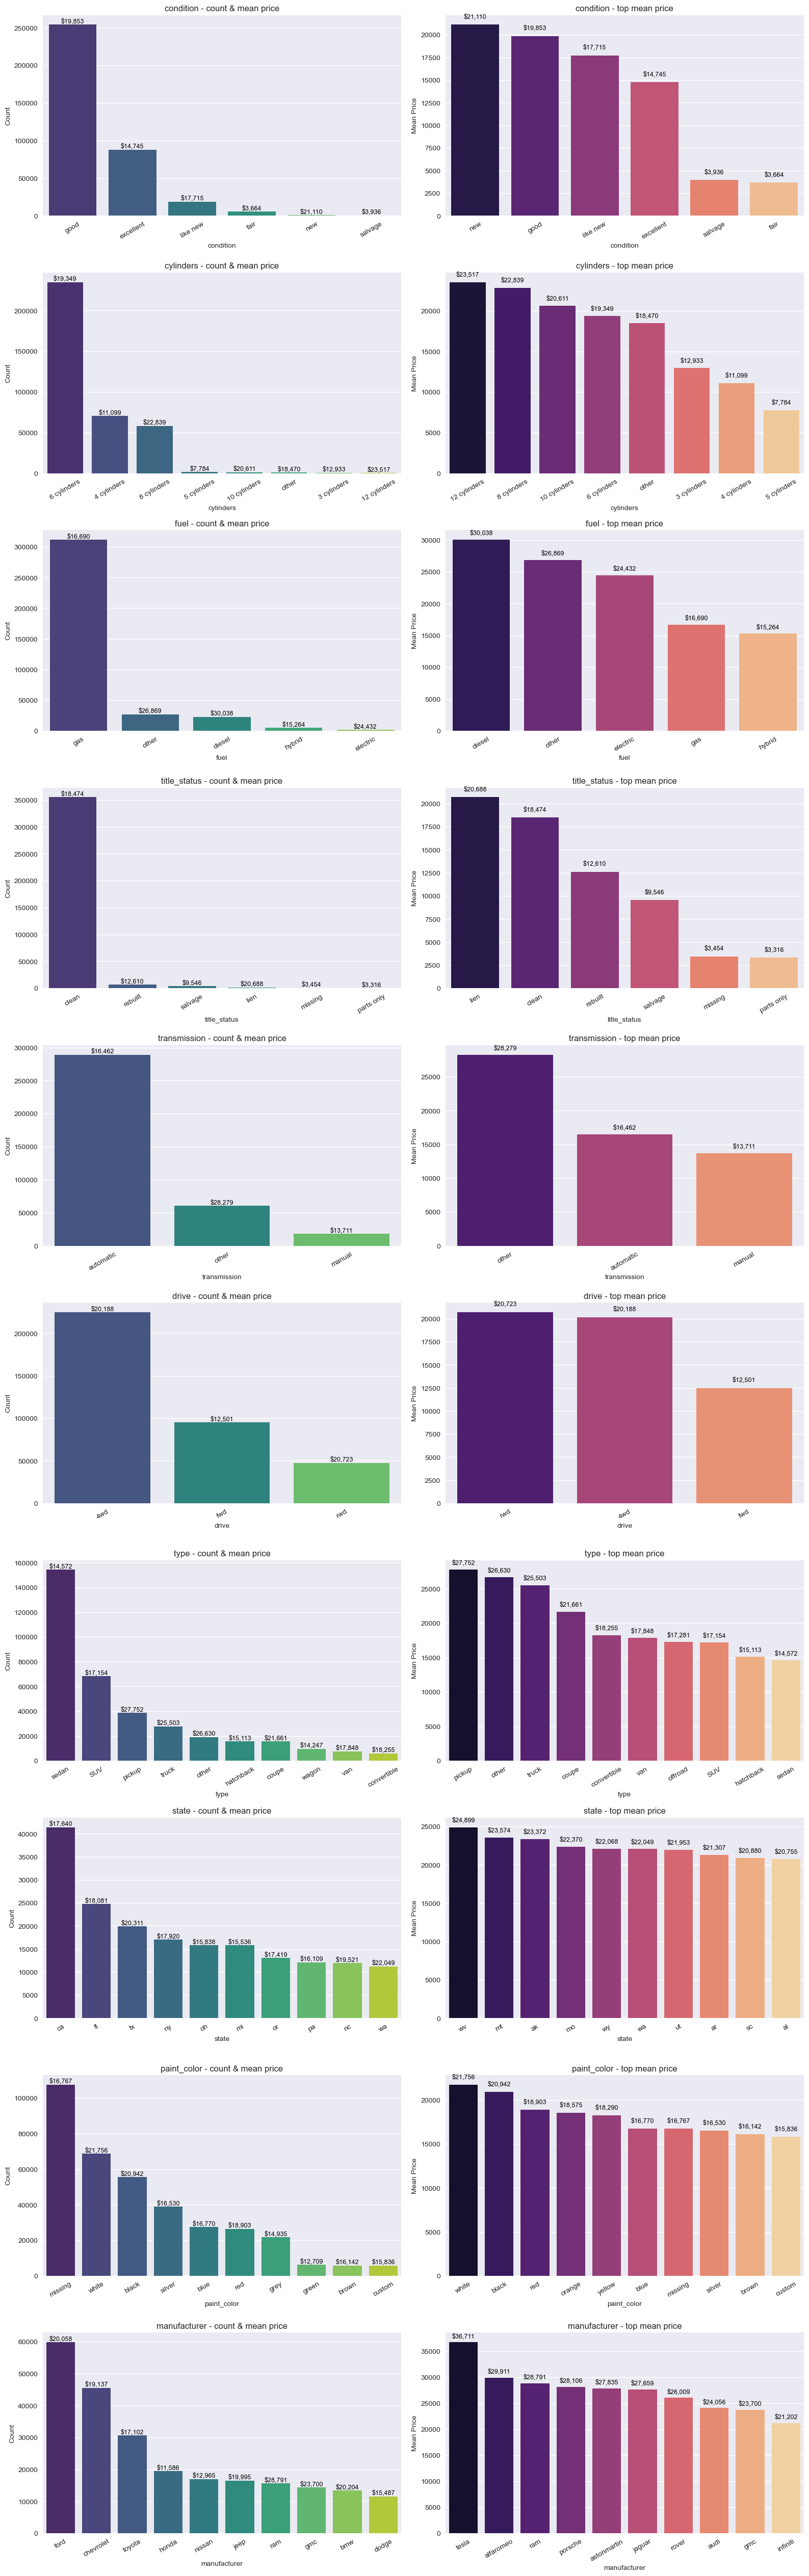

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical columns to analyze
var_col = ['condition', 'cylinders','fuel','title_status','transmission','drive','type','state','paint_color','manufacturer','Luxury_Ind']

# Layout: 12 rows × 2 columns for side-by-side plots
rows, cols = len(var_col), 2
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.reshape(rows, cols)

for i, col in enumerate(var_col):
    try:
        # Left plot: Top 5 categories by frequency
        top_vals_freq = df5[col].value_counts(normalize=True, dropna=False).nlargest(10).index
        df_top_freq = df5[df5[col].isin(top_vals_freq)]
        mean_prices_freq = df_top_freq.groupby(col)['price'].mean()

        sns.countplot(data=df_top_freq, x=col, ax=axes[i, 0], order=top_vals_freq, palette="viridis")
        axes[i, 0].set_title(f"{col} - count & mean price", fontsize=12)
        axes[i, 0].set_xlabel(col, fontsize=10)
        axes[i, 0].set_ylabel("Count", fontsize=10)
        axes[i, 0].tick_params(axis='x', labelrotation=30)

        for p, cat in zip(axes[i, 0].patches, top_vals_freq):
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            mean_val = mean_prices_freq.get(cat, None)
            if mean_val is not None:
                axes[i, 0].text(x, y + 5, f"${mean_val:,.0f}", ha='center', va='bottom', fontsize=9, color='black')

        # Right plot: Top 5 categories by highest mean price (sorted descending)
        mean_prices_all = df5.groupby(col)['price'].mean()
        top_vals_price = mean_prices_all.nlargest(10).sort_values(ascending=False)

        sns.barplot(x=top_vals_price.index, y=top_vals_price.values,
                    ax=axes[i, 1], palette="magma")
        axes[i, 1].set_title(f"{col} - top mean price", fontsize=12)
        axes[i, 1].set_xlabel(col, fontsize=10)
        axes[i, 1].set_ylabel("Mean Price", fontsize=10)
        axes[i, 1].tick_params(axis='x', labelrotation=30)

        for p in axes[i, 1].patches:
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axes[i, 1].text(x, y + 500, f"${y:,.0f}", ha='center', va='bottom', fontsize=9, color='black')

    except Exception as e:
        print(f"Failed to plot '{col}': {e}")
        axes[i, 0].set_visible(False)
        axes[i, 1].set_visible(False)

plt.tight_layout()
plt.show()


#### Step 6. Data Pre-processing & Feature Engineering

   1. Create vehicle_age, mileage_per_year, and ind_luxury
   2. Target Mean Binning or Mean-based Category Grouping - This approach:
       - Reduces cardinality
       - Helps eliminate noise from rare or redundant levels
       - Makes encoding + modeling faster and more interpretable

In [192]:
from datetime import datetime
current_year = datetime.now().year
df5['Age'] = current_year - df5['year']
df5['AnnualMileage'] = df5['odometer'] / df5['Age']
df5['AnnualMileage'] = df5['AnnualMileage'].replace([np.inf, -np.inf], np.nan)
df5['AnnualMileage'].fillna(df5['AnnualMileage'].median(), inplace=True)

# Add categorical features
luxury_brands = ['ferrari','audi', 'bmw', 'mercedes-benz', 'lexus', 'porsche', 'jaguar', 'land rover', 'tesla', 'acura', 'infiniti','lincoln','cadillac']
df5['manufacturer']=df5['manufacturer'].replace('-','')
df5['Luxury_Ind'] = np.where(df5['manufacturer'].isin(luxury_brands), 1, 0)


# df5['ind_electric'] = df5['fuel'].str.contains('electric', case=False, na=False).astype(int)
# df5['ind_hybrid'] = df5['fuel'].str.contains('hybrid', case=False, na=False).astype(int)

print("Feature engineering completed:")
print(f"  Added features: Age, AnnualMileage, Luxury_Ind") #ind_electric, ind_hybrid"

Feature engineering completed:
  Added features: Age, AnnualMileage, Luxury_Ind


In [193]:
# condition: combining salvage (mean=3936) & fair (mean=3703) into salvagefair
df5['condition'] = df5['condition'].replace({'salvage': 'salvagefair', 'fair': 'salvagefair'})

#cylinders: combining 3+4+5 into 345 cyclinders
df5['cylinders'] = df5['cylinders'].replace({'3 cylinders': '3-5 cylinders', '4 cylinders': '3-5 cylinders','5 cylinders': '3-5 cylinders'})
df5['cylinders'] = df5['cylinders'].replace({'6 cylinders': '6-10 cylinders', '8 cylinders': '6-10 cylinders','10 cylinders': '6-10 cylinders', 'other': '6-10 cylinders'})
# title_status: combining missing and parts_only into partsonlymissing
df5['title_status'] = df5['title_status'].replace({'parts only': 'partsonlymissing', 'missing': 'partsonlymissing'})

# fuel: combining other and gas into gasother as they are highly correlated
df5['fuel'] = df5['fuel'].replace({'gas': 'gasother', 'other': 'gasother'})


In [194]:
# Review
cat_cols = df5.select_dtypes(include=['object', 'category'])

for i in cat_cols:
    dist = df5[i].value_counts(normalize=True, dropna=False) * 100
    dist_sorted = dist.sort_values(ascending=False)
    cum_dist = dist_sorted.cumsum()

    dist_df = pd.DataFrame({
        'Percentage': dist_sorted,
        'Cumulative %': cum_dist
    })

    print(f'\n=== {i} Distribution ===')
    print(dist_df, '\n')


=== manufacturer Distribution ===
                 Percentage  Cumulative %
manufacturer                             
ford              16.281848     16.281848
chevrolet         12.383684     28.665531
toyota             8.328799     36.994330
honda              5.299130     42.293460
nissan             4.622455     46.915915
...                     ...           ...
harley-davidson    0.035915     99.992654
astonmartin        0.002993     99.995647
land rover         0.002721     99.998367
ferrari            0.001088     99.999456
morgan             0.000544    100.000000

[42 rows x 2 columns] 


=== condition Distribution ===
             Percentage  Cumulative %
condition                            
good          69.120512     69.120512
excellent     23.922815     93.043327
like new       5.120370     98.163697
salvagefair    1.592242     99.755940
new            0.244060    100.000000 


=== cylinders Distribution ===
                Percentage  Cumulative %
cylinders            

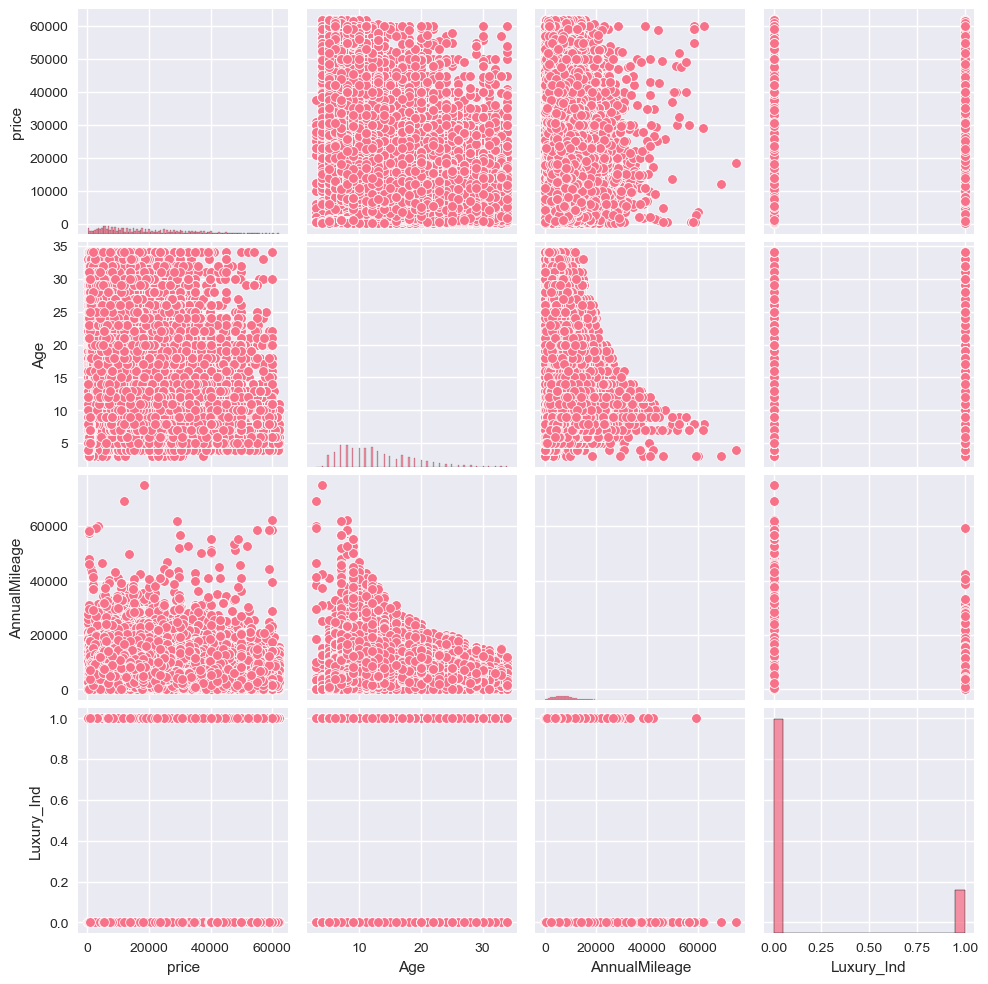

In [198]:
sns.pairplot(df5[['price', 'Age', 'AnnualMileage', 'Luxury_Ind']])
plt.show()

In [199]:
df5.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'Age', 'AnnualMileage', 'Luxury_Ind'],
      dtype='object')

In [253]:
# Define categorical and numeric variables
df5['year']=df5['year'].astype(int).astype(str)
cat_vars = ['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'state']
num_vars = ['Age', 'AnnualMileage', 'Luxury_Ind', 'price']

#One-hot encode categorical variables
df_encoded = df5[cat_vars].reset_index()
df_encoded = pd.get_dummies(df_encoded[cat_vars], drop_first=True, dtype=int)
df_encoded.shape

(367532, 79)

In [254]:
#### Scale data so that each variable has a single unit variance
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # scaler.fit(df3)
# scaled =scaler.fit_transform(df5[num_vars])
# df5_scaled = pd.DataFrame(scaled,columns=num_vars)
# df5_scaled
# type(df5_scaled)

In [255]:
# Combine encoded categorical variables with numeric variables
df6_encoded = pd.concat([df5[num_vars].reset_index(), df_encoded], axis=1)
df6_encoded.shape

(367532, 84)

In [256]:
# Review top correlated variables with price

import pandas as pd

# Create correlation matrix
corr_matrix = df6_encoded.corr()

# Extract correlations with target only
target_corr = corr_matrix['price'].drop('price')

# Sort by strength of relationship
top_corr = target_corr.abs().sort_values(ascending=False)
top_corr
print(top_corr.head(32).to_string())

Age                              0.584468
transmission_other               0.339828
cylinders_3-5 cylinders          0.274217
cylinders_6-10 cylinders         0.273687
AnnualMileage                    0.263198
drive_fwd                        0.261007
type_pickup                      0.248720
type_sedan                       0.240703
fuel_gasother                    0.201826
condition_good                   0.181696
type_truck                       0.158181
type_other                       0.149558
condition_salvagefair            0.142026
Luxury_Ind                       0.109631
transmission_manual              0.079241
type_mini-van                    0.072943
drive_rwd                        0.072481
title_status_salvage             0.067215
title_status_rebuilt             0.059855
type_coupe                       0.054624
state_wa                         0.051418
type_hatchback                   0.050859
type_wagon                       0.050573
state_mt                         0

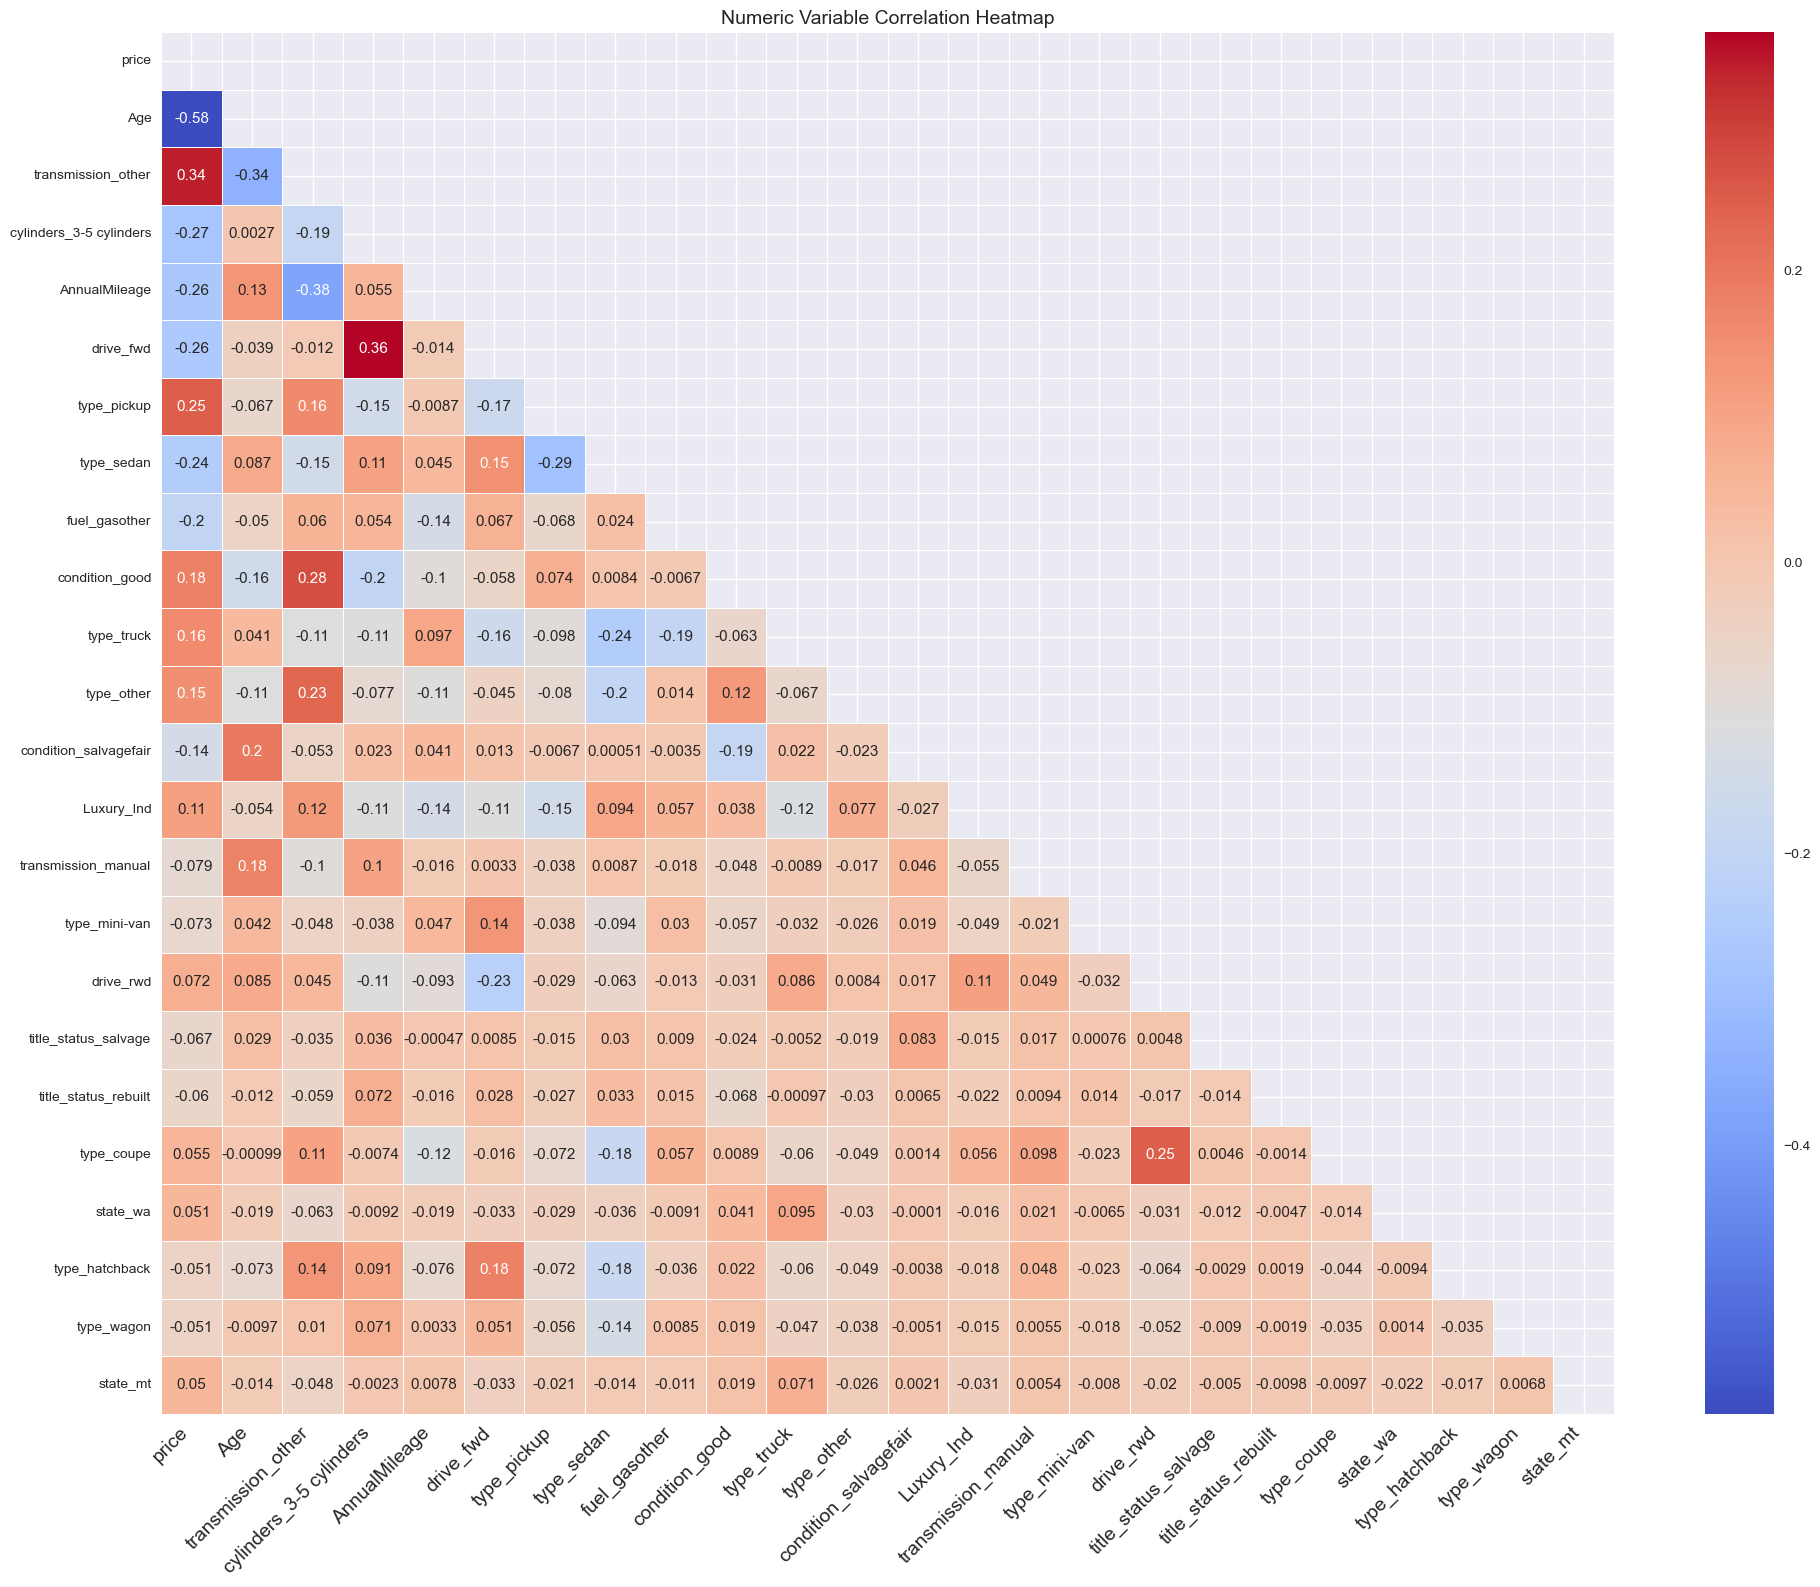

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

col_vars = ['condition', 'cylinders','fuel','title_status','transmission','drive','size','type','state'] # convert year to object
num_vars = ['odometer','year', 'price']
corr_vars = ['price', 'Age','transmission_other','cylinders_3-5 cylinders', 'AnnualMileage','drive_fwd',
             'type_pickup', 'type_sedan','fuel_gasother', 'condition_good','type_truck', 'type_other','condition_salvagefair',
             'Luxury_Ind', 'transmission_manual','type_mini-van','drive_rwd','title_status_salvage',
             'title_status_rebuilt','type_coupe','state_wa','type_hatchback','type_wagon','state_mt']
 # note: 'cylinders_6-10 cylinders' is highly correlated with 'cylinders_3-5 cylinders', so dropped   
# Visualize and review correlation table
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(df6_encoded[corr_vars].corr(), dtype=bool))
sns.heatmap(df6_encoded[corr_vars].corr(), annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=10)

plt.title("Numeric Variable Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

In [258]:
# Separate features and target
# X = df6_encoded.drop('price', axis=1)

X = df6_encoded[['Age','transmission_other','cylinders_3-5 cylinders', 'AnnualMileage','drive_fwd',
             'type_pickup', 'type_sedan','fuel_gasother', 'condition_good','type_truck', 'type_other','condition_salvagefair',
             'Luxury_Ind', 'transmission_manual','type_mini-van','drive_rwd','title_status_salvage',
             'title_status_rebuilt','type_coupe','state_wa','type_hatchback','type_wagon']]
y = df6_encoded['price']

In [259]:
print(f"Important Features For Modeling:")
print(f" - Number of Records: {len(X):,}")
print(f" - Number of Features: {len(X.columns)}")
print(f" - Target range: ${y.min():,.0f} - ${y.max():,.0f}")
    
# X, y = prepare_modeling_data(df_clean)
print(X.sample(3))
print(y.sample(3))

Important Features For Modeling:
 - Number of Records: 367,532
 - Number of Features: 22
 - Target range: $101 - $62,019
         Age  transmission_other  cylinders_3-5 cylinders  AnnualMileage  \
143387   7.0                   1                        0   11085.142857   
9006    19.0                   0                        0   10842.105263   
141032  13.0                   0                        0   13449.846154   

        drive_fwd  type_pickup  type_sedan  fuel_gasother  condition_good  \
143387          0            0           1              1               1   
9006            0            1           0              1               1   
141032          0            0           0              1               1   

        type_truck  ...  Luxury_Ind  transmission_manual  type_mini-van  \
143387           0  ...           1                    0              0   
9006             0  ...           0                    0              0   
141032           0  ...           0     

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Section 2. Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [261]:
# Import modeling libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, r2_score

In [262]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f'{name}: RMSE = {rmse:.2f}, R2 = {r2:.4f}')

Linear Regression: RMSE = 8210.93, R2 = 0.6026
Ridge Regression: RMSE = 8210.93, R2 = 0.6026
Lasso Regression: RMSE = 8210.97, R2 = 0.6026
Elastic Net Regression: RMSE = 9338.00, R2 = 0.4860


**Summary:** Linear Regression has the best performance among the four models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics. Similar output from Ridge and Lasso, which can further be evaluated for different alphas.

- **`RMSE (Root Mean Squared Error) = 8198.24`**: This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 8198.24 units from the actual values of the car price.

- **`R2 (R-squared) = 0.6038`**: This value indicates that approximately 60% of the variance in the target variable (price) is explained by the features in the model. While this is a good level of explanation, it indicates that there is still about 40% of unexplained variance, so suggesting room for model improvement in the next steps.

### Section 3. Evaluation
With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this. We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices. Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [263]:
# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")
    

Linear Regression: Cross-validation RMSE = 8252.1609
Best Ridge: {'alpha': 1.0}, RMSE = 8252.2320
Best Lasso: {'alpha': 0.01}, RMSE = 8252.2321
Best ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}, RMSE = 8252.5988

Evaluate the best models on the test set
Linear Regression: RMSE = 8210.9254, R2 = 0.6026
Ridge: RMSE = 8210.9259, R2 = 0.6026
Lasso: RMSE = 8210.9256, R2 = 0.6026
ElasticNet: RMSE = 8211.4456, R2 = 0.6026


In [264]:
# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['R2'])
print(f"Best model: {best_model_name}")

Best model: Linear Regression


The best model is: "LinearRegression()"
Top 13 features by absolute coefficient value:
fuel_gasother            10258.573333
type_pickup               6188.163661
type_truck                6183.463301
type_hatchback            4941.411555
title_status_salvage      4718.437147
                             ...     
type_sedan                2109.947187
state_wa                  1685.275946
type_coupe                1652.078244
condition_salvagefair     1491.620733
Age                       1256.192420
Length: 17, dtype: float64


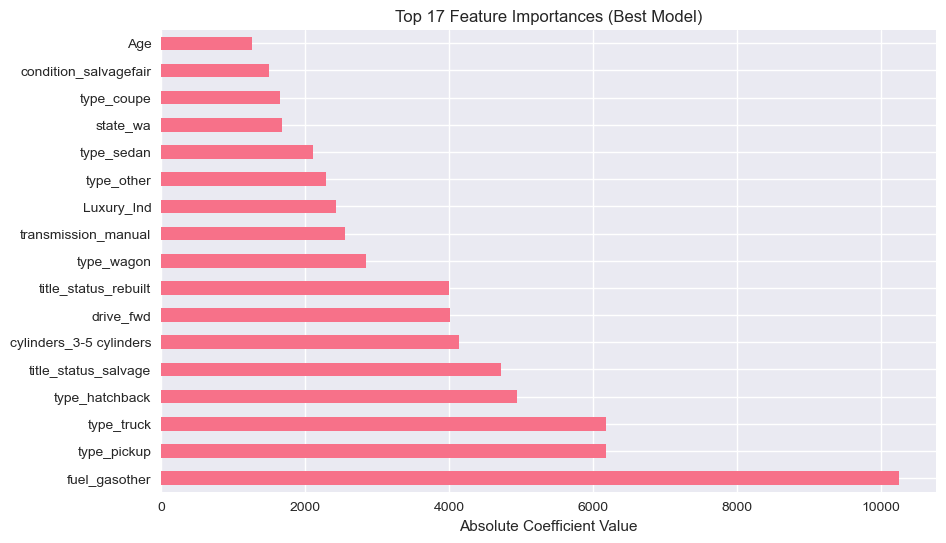

In [265]:
# Set the best model: Lasso or highest R2
best_model_name = max(results.keys(), key=lambda x: results[x]['R2'])
if 'Linear Regression' in best_models:
    best_model = best_models['Linear Regression']
else:
    best_model = best_models[best_model_name]
print(f'The best model is: "{best_model}"')

if hasattr(best_model, 'coef_'):
    coefs = pd.Series(best_model.coef_, index=X.columns)
    top_features = coefs.abs().nlargest(17)
    print('Top 13 features by absolute coefficient value:')
    print(top_features)
    plt.figure(figsize=(10, 6))
    top_features.plot(kind='barh')
    plt.title('Top 17 Feature Importances (Best Model)')
    plt.xlabel('Absolute Coefficient Value')
    plt.show()

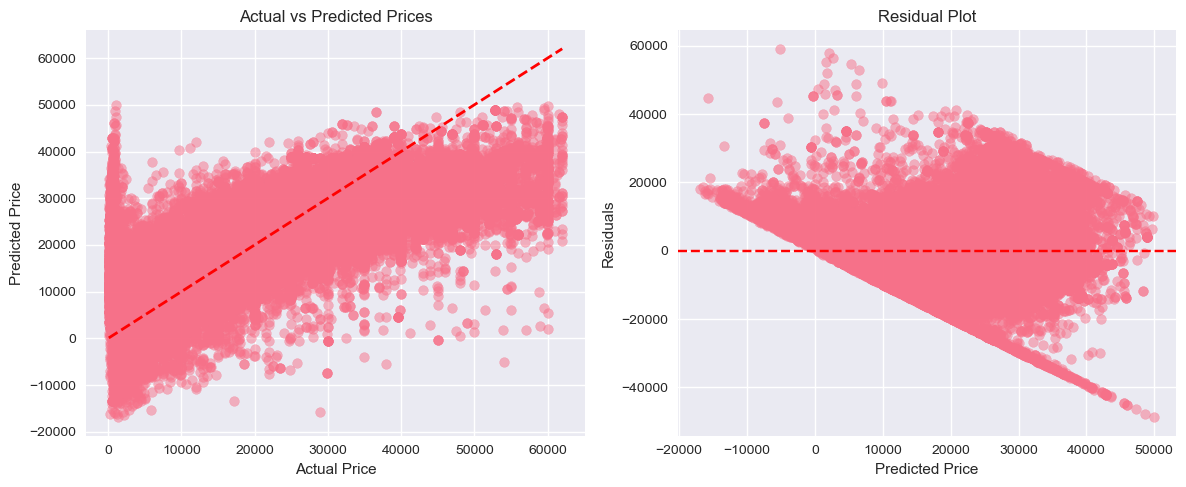


Model Performance by Price Range:
                    Residual                
                        mean      std  count
Price_Range                                 
(39.101, 12480.8]   -3653.69  7084.91  30819
(12480.8, 24860.6]  -1656.12  5166.83  20837
(24860.6, 37240.4]   3230.63  5965.00  14796
(37240.4, 49620.2]  11059.15  6334.32   5487
(49620.2, 62000.0]  21527.61  7405.85   1568


In [266]:
# Visualize Model performance
plt.figure(figsize=(12, 5))

# Actual vs Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

# Residuals
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Performance by price range
price_ranges = pd.cut(y_test, bins=5)
range_performance = pd.DataFrame({
    'Price_Range': price_ranges,
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})

range_metrics = range_performance.groupby('Price_Range').agg({
    'Residual': ['mean', 'std', 'count']
}).round(2)

print("\nModel Performance by Price Range:")
print(range_metrics)

        Actual     Predicted
149918   30990  38170.447560
244742   11795  18933.557258
125982   24977  20159.924189
25476     8800  11802.609673
109981   37981  26313.366572


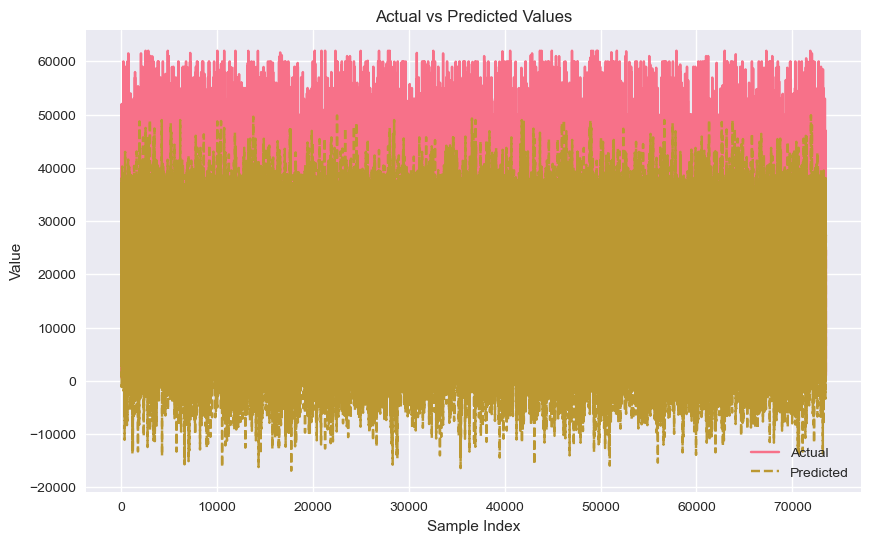

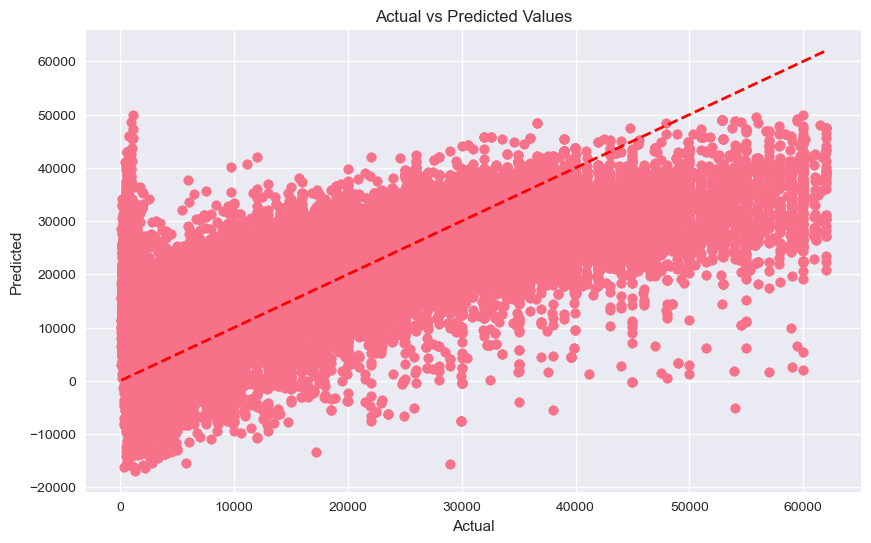

In [267]:
import matplotlib.pyplot as plt

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the comparison
print(comparison_df.head())

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'].values, label='Actual')
plt.plot(comparison_df['Predicted'].values, label='Predicted', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

# Scatter plot for better visual comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'])
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#### Best Selected Model: Linear Regression from cross-validation

In [268]:
from sklearn.model_selection import cross_val_score, KFold
# Initialize the linear regression model
model = LinearRegression()

# Use KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and collect coefficients
coefficients = []
scores = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    model.fit(X_train_fold, y_train_fold)
    coefficients.append(model.coef_)
    scores.append(model.score(X_test_fold, y_test_fold))

# Convert list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=X_train.columns)

# Evaluate coefficients (e.g., mean and standard deviation across folds)
coefficients_mean = coefficients_df.mean()
coefficients_std = coefficients_df.std()

print("Coefficients mean:")
print(coefficients_mean)
print("\nCoefficients standard deviation:")
print(coefficients_std)

# Evaluate scores
mean_score = np.mean(scores)
std_score = np.std(scores)

print("\nMean cross-validation score:", mean_score)
print("Standard deviation of cross-validation score:", std_score)

Coefficients mean:
Age                       -1256.195138
transmission_other          870.860478
cylinders_3-5 cylinders   -4141.808620
AnnualMileage                -0.634849
drive_fwd                 -4011.339349
                              ...     
title_status_rebuilt      -3997.632172
type_coupe                 1652.203727
state_wa                   1685.151926
type_hatchback            -4941.476538
type_wagon                -2844.434767
Length: 22, dtype: float64

Coefficients standard deviation:
Age                         1.688939
transmission_other         40.617831
cylinders_3-5 cylinders    17.075465
AnnualMileage               0.005327
drive_fwd                   8.178860
                             ...    
title_status_rebuilt       35.544192
type_coupe                 36.603863
state_wa                   99.010515
type_hatchback             15.884737
type_wagon                 40.332639
Length: 22, dtype: float64

Mean cross-validation score: 0.6011045206898572
Standard

In [269]:
# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()

,Actual,Predicted
149918,30990,38170.447560
244742,11795,18933.557258
125982,24977,20159.924189
25476,8800,11802.609673
109981,37981,26313.366572


In [270]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the entire training dataset
model.fit(X_train, y_train)

# Predict on the test dataset
y_pred = model.predict(X_test)

In [271]:
model.coef_

array([-1.25619242e+03,  8.70942211e+02, -4.14183340e+03, -6.34852595e-01,
       -4.01135862e+03,  6.18816366e+03, -2.10994719e+03, -1.02585733e+04,
        6.03198075e+02,  6.18346330e+03,  2.29193430e+03, -1.49162073e+03,
        2.43234880e+03,  2.55346300e+03, -1.25459828e+03,  7.41932155e+02,
       -4.71843715e+03, -3.99743550e+03,  1.65207824e+03,  1.68527595e+03,
       -4.94141155e+03, -2.84439176e+03])

In [272]:
model.intercept_

np.float64(48932.45177776974)

In [273]:
model.feature_names_in_

array(['Age', 'transmission_other', 'cylinders_3-5 cylinders',
       'AnnualMileage', 'drive_fwd', 'type_pickup', 'type_sedan',
       'fuel_gasother', 'condition_good', 'type_truck', 'type_other',
       'condition_salvagefair', 'Luxury_Ind', 'transmission_manual',
       'type_mini-van', 'drive_rwd', 'title_status_salvage',
       'title_status_rebuilt', 'type_coupe', 'state_wa', 'type_hatchback',
       'type_wagon'], dtype=object)

In [285]:
model_coeff = pd.DataFrame({
    'Feature': model.feature_names_in_,
    'Coeff': model.coef_
})
model_coeff.sort_values('Coeff', ascending=False).reset_index(drop=True).to_csv('coeff.csv')

### Section 4. Deployment

In conclusion, this project focused on predicting used car prices using a structured approach based on the CRISP-DM framework. We started with understanding business objectives and data collection, followed by thorough data preparation, modeling, evaluation, and deployment phases. Here's a summary of our findings and actionable insights:

#### 1. Data Analytics Finding Summary
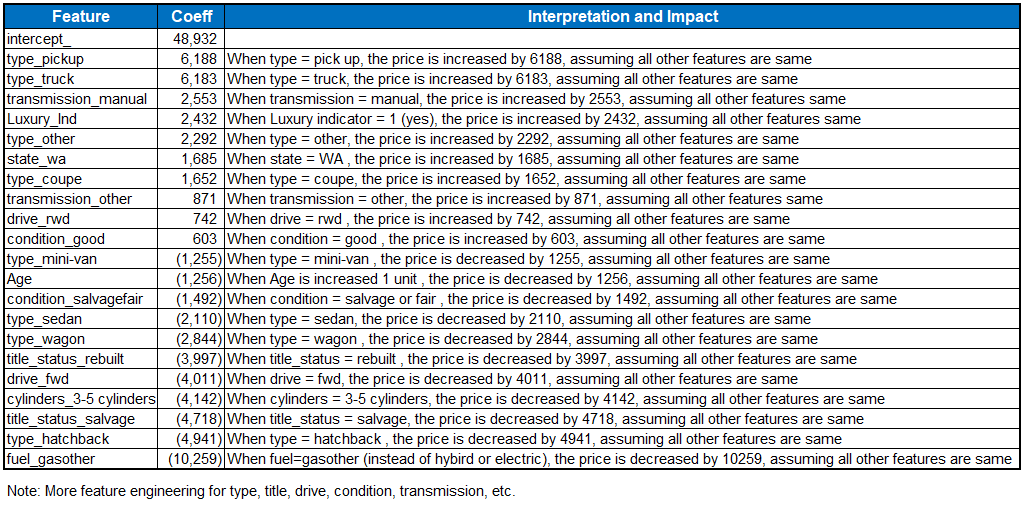

#### 2. Actionable Insights

- **Optimize Pricing Strategy:**
    - Implement dynamic pricing based on mileage, vehicle age, and demand to maximize profits.
    - Monitor regional trends and adjust prices to align with local market conditions.

- **Continuous Model Refinement:**
    - Regularly update the predictive model with new data to maintain accuracy.
    - Incorporate user feedback and market insights to enhance model performance.

By leveraging these insights, our business can improve its competitive edge, drive revenue growth, and enhance customer satisfaction.

#### 3. Analytics Tools
 - **Developing a pricing dashboard**

 ###  Section 5.Next Steps
1. PCA: performed but not implemented as less interpretable 
2. DBSCAN could be utilized to identify outliers
3. Time series: price vs year
4. VIN: could be decoded to have more accurate vehicle attributes
5. More Feature Engineering
6. Analytics Tool Development, such as a interactive pricing dashboard 


In [ ]:
# Drop invalid VIN: len = 17
# df1['VIN_length'] = df1['VIN'].str.len()
# df1['VIN_length'].value_counts(dropna=False)
# df2['price_grp'] = df2['price'].apply(price_grp)
# df2['price_grp'].value_counts(dropna=False)

In [286]:
# Decdoe VIN to get more accurate vehicle attribues - hold on for now
# import pandas as pd
# import requests
# import time

# # Function to decode one VIN
# def decode_vin(vin):
#     url = f'https://vpic.nhtsa.dot.gov/api/vehicles/DecodeVin/{vin}?format=json'
#     try:
#         response = requests.get(url, timeout=10)
#         response.raise_for_status()
#         data = response.json()

#         # Extract only useful non-null attributes
#         results = {item['Variable']: item['Value'] for item in data['Results'] if item['Value']}
#         results['VIN'] = vin  # Add VIN back into the results
#         return results
#     except Exception as e:
#         print(f"Error decoding VIN {vin}: {e}")
#         return {'VIN': vin, 'Error': str(e)}

# # Load CSV with VIN column
# input_file = df
# # df = pd.read_csv(input_file)

# # Check if VIN column exists
# if 'VIN' not in df.columns:
#     raise ValueError("Missing 'VIN' column.")

# # Decode each VIN
# decoded_data = []
# for vin in df['VIN']:
#     decoded = decode_vin(vin)
#     decoded_data.append(decoded)
#     time.sleep(1)  # polite delay to avoid overwhelming the API

# # Convert results to DataFrame
# decoded_df = pd.DataFrame(decoded_data)

# # Optional: select and rename a few common columns
# common_cols = {
#     'VIN': 'VIN',
#     'Make': 'Make',
#     'Model': 'Model',
#     'Model Year': 'Year',
#     'Vehicle Type': 'VehicleType',
#     'Body Class': 'BodyStyle',
#     'Engine Model': 'EngineModel',
#     'Engine Cylinders': 'Cylinders',
#     'Engine Displacement (L)': 'EngineSizeL'
# }

# # Keep only available columns
# filtered_df = decoded_df[[col for col in common_cols if col in decoded_df.columns]]
# filtered_df = filtered_df.rename(columns=common_cols)

# # Save to new CSV
# output_file = 'decoded_vins.csv'
# filtered_df.to_csv(output_file, index=False)

# print(f"Decoded data saved to: {output_file}")
